### Análise de arquivos únicos de voo de uma aeronave

Este notebook destina-se à análise inicial dos arquivos disponibilizados. A princípio, entende-se que cada arquivo de extensão .parquet representa um voo de uma determinada aeronave. A análise leva em consideração os atributos considerados mais relevantes para o entendimento inicial do problema, como fase de voo e status de falha do Sistema de Bleed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Abaixo, foram considerados três arquivos distintos. Para dois dos três arquivos, foi encontrada uma anomalia: eles apresentavam apenas uma fase de voo ao longo do tempo em que os dados foram coletados. Acredita-se que pode haver uma correlação entre a fase de voo pela qual a aeronave está passando em um dado momento e a ocorrência de falhas no Sistema de Bleed.

In [3]:
# df = pd.read_parquet('../data/TCRF_ARCHIVE_06120018_20230602190605.parquet') # erro 
df = pd.read_parquet('./data/TCRF_ARCHIVE_06120018_20230531155039.parquet') # erro 
# df = pd.read_parquet('../data/TCRF_ARCHIVE_06120018_20220930112138.parquet') # normal
df.head()

,recording_time,aircraftSerNum-1,amscChBasHealthStatus-1b,amscChBasHealthStatus-1a,amscChBasHealthStatus-2b,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,...,message0418DAA-1,message0422DAA-1,messageInhibitPhases-1,phaseOfFlight-1,phaseOfFlightNavigation-1,sfyBasFaultWord1Bit13-1a,sfyBasFaultWord1Bit13-2b,timeHours-1,timeMinutes-1,timeSeconds-1
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
1,50,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
3,150,20018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,14.0,2.0,50.0
4,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN


In [101]:
df["message0422DAA-1"].unique()

array([nan,  0.,  5.,  7.])

In [102]:
df["message0422DAA-1"].value_counts()

message0422DAA-1
0.0    6102
7.0      70
5.0       3
Name: count, dtype: int64

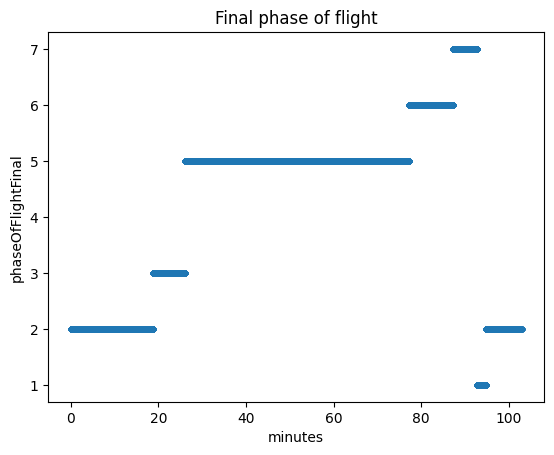

In [103]:
plt.plot(df["recording_time"]/60000, df["phaseOfFlightNavigation-1"], marker=".")
plt.figsize=(20, 10)
plt.xlabel("minutes")
plt.ylabel("phaseOfFlightFinal")
plt.title("Final phase of flight")
plt.show()

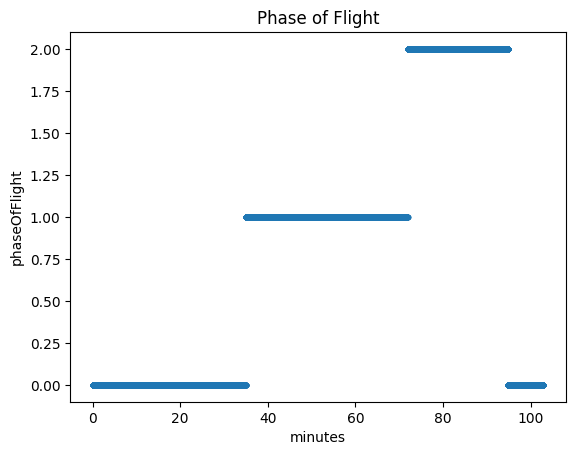

In [104]:
plt.plot(df["recording_time"]/60000, df["phaseOfFlight-1"], marker=".")
plt.xlabel("minutes")
plt.ylabel("phaseOfFlight")
plt.title("Phase of Flight")
plt.show()

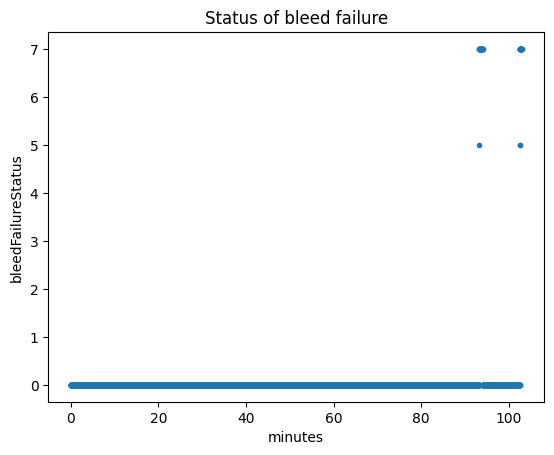

In [105]:
plt.plot(df["recording_time"]/60000, df["message0422DAA-1"], marker=".")
plt.figsize=(20, 10)
plt.xlabel("minutes")
plt.ylabel("bleedFailureStatus")
plt.title("Status of bleed failure")
plt.show()

In [106]:
indice_valor_2 = df[df['phaseOfFlight-1'] == 2].index[0]
df = df[indice_valor_2:]

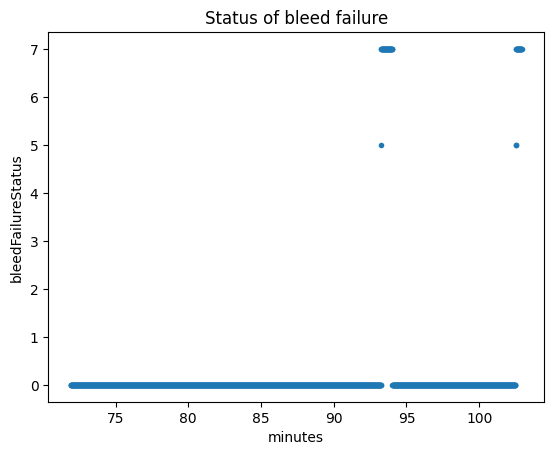

In [107]:
plt.plot(df["recording_time"]/60000, df["message0422DAA-1"], marker=".")
plt.figsize=(20, 10)
plt.xlabel("minutes")
plt.ylabel("bleedFailureStatus")
plt.title("Status of bleed failure")
plt.show()

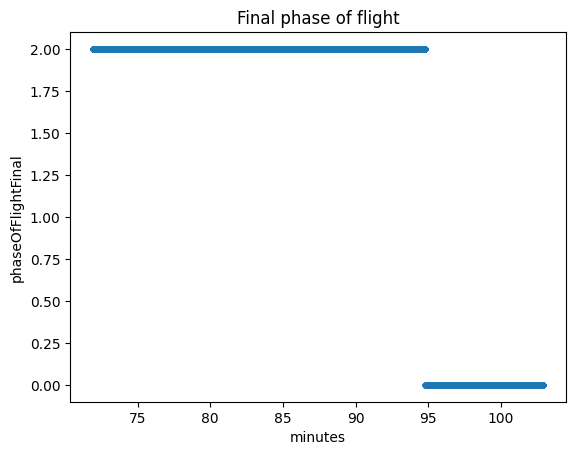

In [108]:
plt.plot(df["recording_time"]/60000, df["phaseOfFlight-1"], marker=".")
plt.figsize=(20, 10)
plt.xlabel("minutes")
plt.ylabel("phaseOfFlightFinal")
plt.title("Final phase of flight")
plt.show()

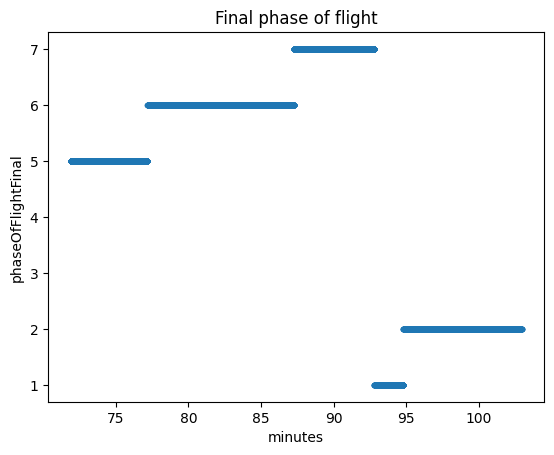

In [109]:
plt.plot(df["recording_time"]/60000, df["phaseOfFlightNavigation-1"], marker=".")
plt.figsize=(20, 10)
plt.xlabel("minutes")
plt.ylabel("phaseOfFlightFinal")
plt.title("Final phase of flight")
plt.show()

In [110]:
df.reset_index(drop=True, inplace=True)
df

,recording_time,aircraftSerNum-1,amscChBasHealthStatus-1b,amscChBasHealthStatus-1a,amscChBasHealthStatus-2b,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,...,message0418DAA-1,message0422DAA-1,messageInhibitPhases-1,phaseOfFlight-1,phaseOfFlightNavigation-1,sfyBasFaultWord1Bit13-1a,sfyBasFaultWord1Bit13-2b,timeHours-1,timeMinutes-1,timeSeconds-1
0,4313900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
1,4313950,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,4314000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,4314050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4314100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37238,6175800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
37239,6175850,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
37240,6175900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
37241,6175950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
indice_valor_7 = df[df['phaseOfFlightNavigation-1'] == 7].index[0]
print(indice_valor_7)

18441


In [112]:
df = df[indice_valor_7:]
df


,recording_time,aircraftSerNum-1,amscChBasHealthStatus-1b,amscChBasHealthStatus-1a,amscChBasHealthStatus-2b,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,...,message0418DAA-1,message0422DAA-1,messageInhibitPhases-1,phaseOfFlight-1,phaseOfFlightNavigation-1,sfyBasFaultWord1Bit13-1a,sfyBasFaultWord1Bit13-2b,timeHours-1,timeMinutes-1,timeSeconds-1
18441,5235950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
18442,5236000,20018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,15.0,30.0,6.0
18443,5236050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
18444,5236100,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
18445,5236150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37238,6175800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
37239,6175850,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
37240,6175900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
37241,6175950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


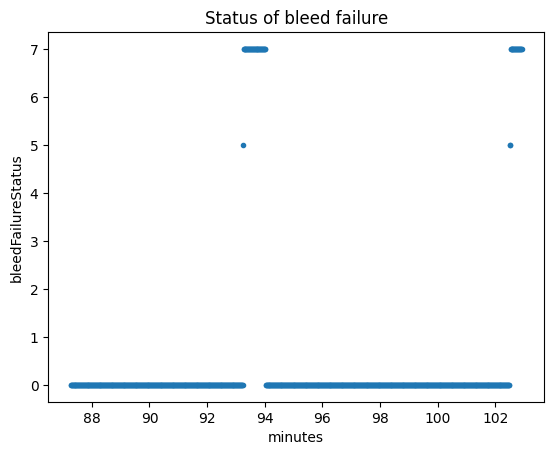

In [113]:
plt.plot(df["recording_time"]/60000, df["message0422DAA-1"], marker=".")
plt.figsize=(20, 10)
plt.xlabel("minutes")
plt.ylabel("bleedFailureStatus")
plt.title("Status of bleed failure")
plt.show()

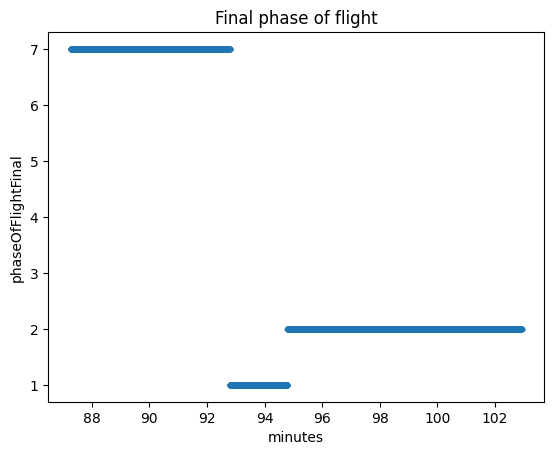

In [114]:
plt.plot(df["recording_time"]/60000, df["phaseOfFlightNavigation-1"], marker=".")
plt.figsize=(20, 10)
plt.xlabel("minutes")
plt.ylabel("phaseOfFlightFinal")
plt.title("Final phase of flight")
plt.show()